In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')


In [152]:
#read data and clean
url= r"https://github.com/JachiOzoh/Data-Analysis-Projects/blob/main/restaurant_survey_eda_data.csv?raw=true"

def read_n_clean(url):
    df = pd.read_csv(url)
    #removing whitespace from headers. Noticed whitespace in the column header 'Alcohol'. Initially, 'Alcohol '
    print("Removing whitespace from headers...")
    df=df.rename(columns=lambda x: x.rstrip())
    print("Creating new columns...")
    df['Location']=df['Location'].replace('Central Park,ny','Central Park,NY')
    df['Location']=df['Location'].replace('Market City, MY','Market City, NY')
    df['Age'] = 2025 - df['YOB']
    bins=['Teens','Twenties','Thirties','Fourties','Fifties','Sixties']
    bins_edges=[15,20,30,40,50,60,70]
    df['Age Group']=pd.cut(df['Age'],bins=bins_edges,labels=bins)
    return df
df=read_n_clean(url)

Removing whitespace from headers...
Creating new columns...


In [153]:
def create_numerized_dataframe(df):
    df_num = df.copy()
    for col in df_num.columns:
        if(df_num[col].dtype == 'category'):
            df_num[col] = df_num[col].cat.codes
        elif(df_num[col].dtype == 'object'):
            df_num[col]= df_num[col].astype('category')
            df_num[col] = df_num[col].cat.codes
    return df_num
df_num=create_numerized_dataframe(df)
df_num

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S,Age,Age Group
0,1,153,6,0,2006,2,0,3,5,0,0,5,4,4.5,0,19,0
1,2,123,5,0,1991,1,1,3,3,0,2,1,1,1.0,0,34,2
2,3,122,7,1,1977,2,1,5,6,1,1,5,5,5.0,1,48,3
3,4,153,6,0,1956,1,0,5,5,0,2,3,1,2.0,0,69,5
4,5,129,1,1,1997,2,1,4,1,2,0,2,4,3.0,0,28,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,175,5,0,1982,2,0,4,2,0,2,1,2,1.5,0,43,3
196,197,170,7,0,2000,1,1,4,0,0,1,1,2,1.5,0,25,1
197,198,160,5,0,2006,2,0,5,5,0,1,5,2,3.5,0,19,0
198,199,130,5,1,2002,1,1,3,1,0,2,3,2,2.5,0,23,1


## Data Validation

In [154]:
def validate_data(df):
    # Extract info about dataset
    dataframe_info={
    "info":df.info(),
    "shape":df.shape,
    "describe":df.describe(),
    "null_count":df.isnull().sum(),
    }
    return dataframe_info
v=validate_data(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   User ID         200 non-null    int64   
 1   Area code       200 non-null    int64   
 2   Location        200 non-null    object  
 3   Gender          200 non-null    object  
 4   YOB             200 non-null    int64   
 5   Marital Status  200 non-null    object  
 6   Activity        200 non-null    object  
 7   Budget          200 non-null    int64   
 8   Cuisines        200 non-null    object  
 9   Alcohol         200 non-null    object  
 10  Smoker          200 non-null    object  
 11  Food Rating     200 non-null    int64   
 12  Service Rating  200 non-null    int64   
 13  Overall Rating  200 non-null    float64 
 14  Often A S       200 non-null    object  
 15  Age             200 non-null    int64   
 16  Age Group       200 non-null    category
dtypes: category(1), 

In [155]:
v.get("null_count")

User ID           0
Area code         0
Location          0
Gender            0
YOB               0
Marital Status    0
Activity          0
Budget            0
Cuisines          0
Alcohol           0
Smoker            0
Food Rating       0
Service Rating    0
Overall Rating    0
Often A S         0
Age               0
Age Group         0
dtype: int64

In [156]:
v.get("describe")

,User ID,Area code,YOB,Budget,Food Rating,Service Rating,Overall Rating,Age
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,141.060000,1984.830000,3.815000,3.220000,3.230000,3.225000,40.170000
std,57.879185,26.130257,16.809339,1.056578,1.411226,1.526022,1.079445,16.809339
min,1.000000,101.000000,1955.000000,1.000000,1.000000,1.000000,1.000000,16.000000
25%,50.750000,123.000000,1971.000000,3.000000,2.000000,2.000000,2.500000,25.000000
50%,100.500000,135.000000,1987.000000,4.000000,3.000000,3.000000,3.000000,38.000000
75%,150.250000,158.000000,2000.000000,5.000000,5.000000,5.000000,4.000000,54.000000
max,200.000000,199.000000,2009.000000,5.000000,5.000000,5.000000,5.000000,70.000000


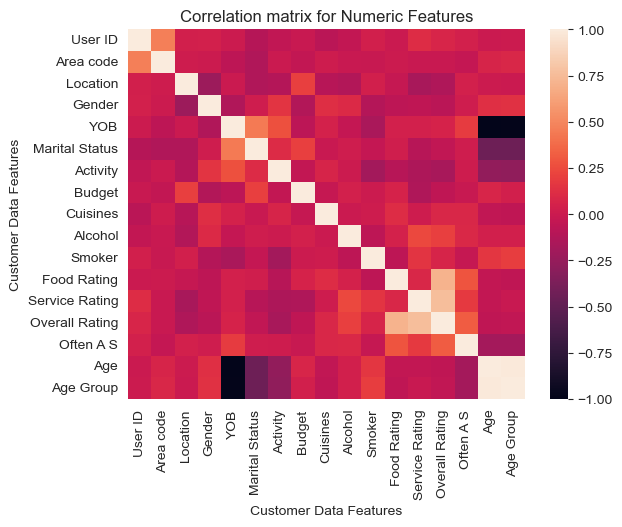

In [157]:
c_matrix = df_num.corr()

sns.heatmap(c_matrix)
plt.title("Correlation matrix for Numeric Features")
plt.xlabel("Customer Data Features")
plt.ylabel("Customer Data Features")
plt.show()

In [158]:
df_all_average_ratings=df[['Overall Rating','Service Rating','Food Rating']].mean()

## Age Analysis

In [159]:
print(f'The minumum customer age is {df['Age'].min()}')
print(f'The maximum customer age is {df['Age'].max()}')

The minumum customer age is 16
The maximum customer age is 70


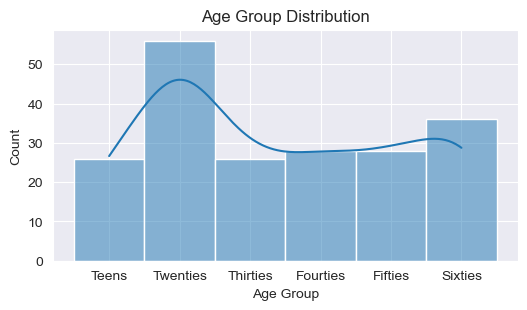

In [160]:
plt.figure(figsize=(6, 3))
sns.histplot(data=df, x='Age Group', kde=True)
plt.title("Age Group Distribution")
plt.show()

The most numerous age group is the 'Thirties' age group

In [161]:
df_age_rating_avg=df.groupby('Age Group',observed=True)[['Overall Rating','Service Rating','Food Rating']].agg(['mean'])
df_age_rating_avg

,Overall Rating,Service Rating,Food Rating
,mean,mean,mean
Age Group,,,
Teens,3.423077,3.115385,3.730769
Twenties,3.250000,3.339286,3.160714
Thirties,2.750000,2.923077,2.576923
Fourties,3.428571,3.392857,3.464286
Fifties,3.642857,3.642857,3.642857
Sixties,2.902778,2.916667,2.888889


## Gender Analysis 

In [162]:
ismale=df['Gender']=='Male'
isfemale=df['Gender']=='Female'
print(f'total male customers: {ismale.sum()}')
print(f'total female customers: {isfemale.sum()}')

total male customers: 118
total female customers: 82


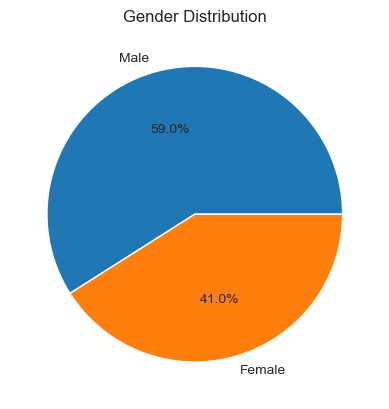

In [163]:
gender_counts = df['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

The pie chart above shows that most of the restaurant customers are male.

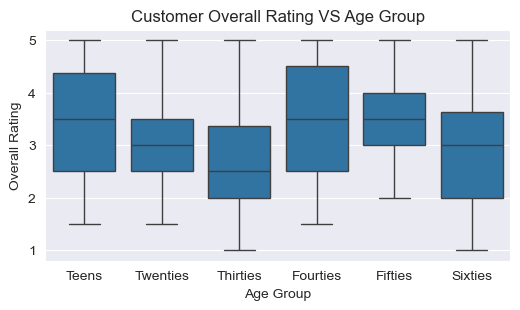

In [164]:
plt.figure(figsize=(6, 3))
sns.boxplot(data=df, x='Age Group', y='Overall Rating')
plt.title('Customer Overall Rating VS Age Group')
plt.show()

In [165]:
df_gender_rating_avg=df.groupby('Gender',observed=True)[['Overall Rating','Service Rating','Food Rating']].agg(['mean'])
df_gender_rating_avg

,Overall Rating,Service Rating,Food Rating
,mean,mean,mean
Gender,,,
Female,3.335366,3.341463,3.329268
Male,3.148305,3.152542,3.144068


## Customer Habits Analysis

In [166]:
print(df['Alcohol'].unique())
print(df['Smoker'].unique())

['Never' 'Often' 'Socially']
['Never' 'Socially' 'Often']


In [167]:
df_smoker_rating_avg=df.groupby('Smoker',observed=True)[['Overall Rating','Service Rating','Food Rating']].agg(['mean'])
df_smoker_rating_avg

,Overall Rating,Service Rating,Food Rating
,mean,mean,mean
Smoker,,,
Never,2.737288,2.644068,2.830508
Often,3.885714,3.671429,4.100000
Socially,2.978873,3.281690,2.676056


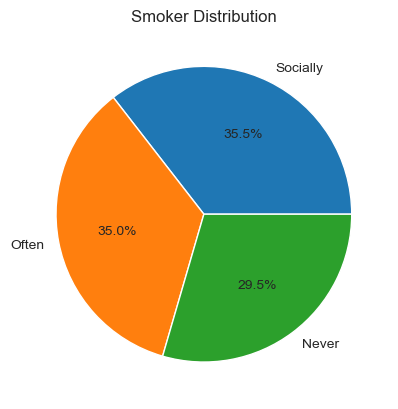

In [168]:
smoker_counts = df['Smoker'].value_counts()
plt.pie(smoker_counts, labels=smoker_counts.index, autopct='%1.01f%%')
plt.title('Smoker Distribution')
plt.show()

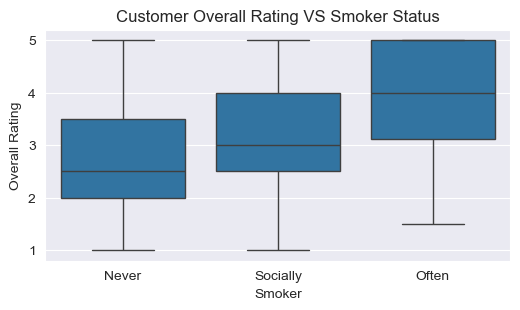

In [169]:
plt.figure(figsize=(6, 3))
sns.boxplot(data=df, x='Smoker', y='Overall Rating')
plt.title('Customer Overall Rating VS Smoker Status')
plt.show()

This shows that people who smoke often, give higer ratings on average than social smokers or non-smokers.

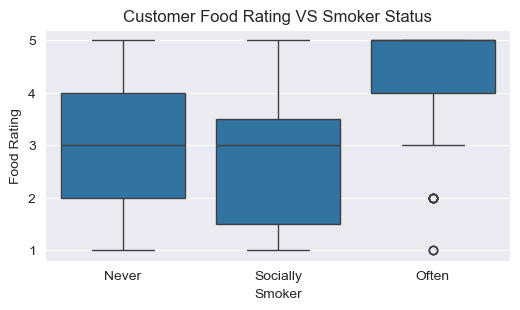

In [170]:
plt.figure(figsize=(6, 3))
sns.boxplot(data=df, x='Smoker', y='Food Rating')
plt.title('Customer Food Rating VS Smoker Status')
plt.show()

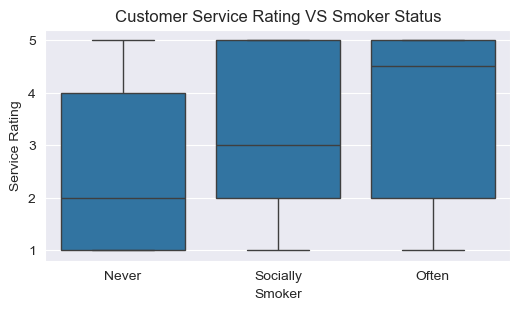

In [171]:
plt.figure(figsize=(6, 3))
sns.boxplot(data=df, x='Smoker', y='Service Rating')
plt.title('Customer Service Rating VS Smoker Status')
plt.show()

In [172]:
df_alcohol_rating_avg=df.groupby('Alcohol',observed=True)[['Overall Rating','Service Rating','Food Rating']].agg(['mean'])
df_alcohol_rating_avg

,Overall Rating,Service Rating,Food Rating
,mean,mean,mean
Alcohol,,,
Never,2.965909,2.840909,3.090909
Often,3.393443,3.377049,3.409836
Socially,3.470588,3.725490,3.215686


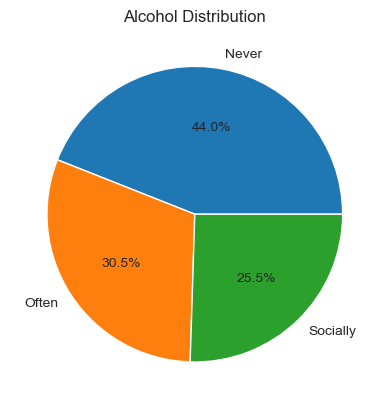

In [173]:
alcohol_counts = df['Alcohol'].value_counts()
plt.pie(alcohol_counts, labels=alcohol_counts.index, autopct='%1.01f%%')
plt.title('Alcohol Distribution')
plt.show()

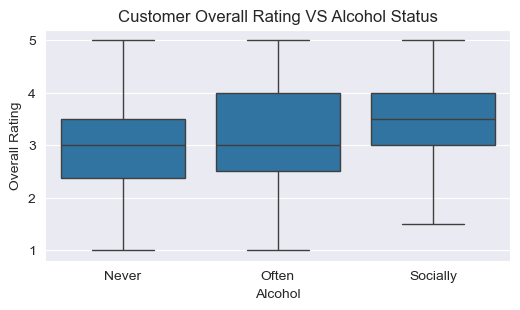

In [174]:
plt.figure(figsize=(6, 3))
sns.boxplot(data=df, x='Alcohol', y='Overall Rating')
plt.title('Customer Overall Rating VS Alcohol Status')
plt.show()

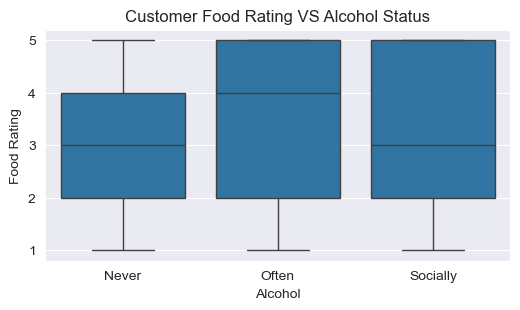

In [175]:
plt.figure(figsize=(6, 3))
sns.boxplot(data=df, x='Alcohol', y='Food Rating')
plt.title('Customer Food Rating VS Alcohol Status')
plt.show()

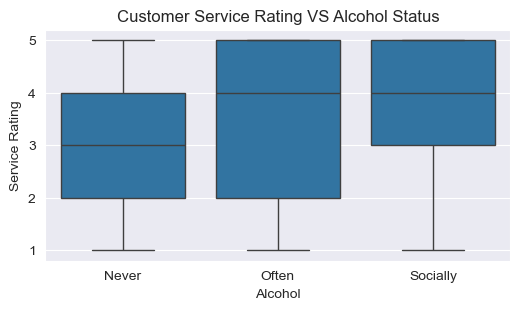

In [176]:
plt.figure(figsize=(6, 3))
sns.boxplot(data=df, x='Alcohol', y='Service Rating')
plt.title('Customer Service Rating VS Alcohol Status')
plt.show()

## Cuisine Analysis

In [177]:
df['Cuisines'].value_counts()

Cuisines
Japanese    36
Filipino    34
French      34
Indian      32
Chinese     24
Seafood     22
Italian     18
Name: count, dtype: int64

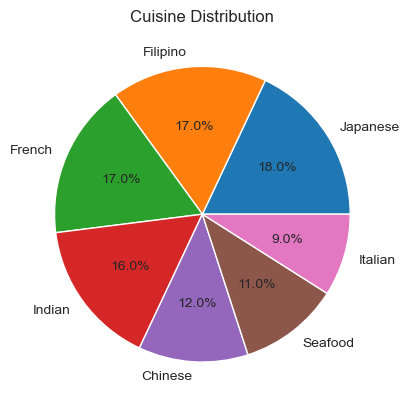

In [178]:
# autopct controls the format of the percentages on the pie chart. first
cuisine_counts = df['Cuisines'].value_counts()
plt.pie(cuisine_counts, labels=cuisine_counts.index, autopct='%1.01f%%')
plt.title('Cuisine Distribution')
plt.show()

According to the data, Japanese cuisine is the most popular among restaurant customers. Italian, however, is unpopular among customers

In [179]:
df.loc[df['Cuisines']=='Japanese','Budget'].mean()

4.111111111111111

## Budget

In [180]:
df.groupby('Marital Status')['Budget'].agg('mean')

Marital Status
Divorced    2.571429
Married     3.918605
Single      3.900000
Name: Budget, dtype: float64

In [ ]:
df.groupby('Age Group')['Budget'].agg('mean')

C:\Users\Jachimike\AppData\Local\Temp\ipykernel_22856\1957909697.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Age Group')['Budget'].agg('mean')


Age Group
Teens       4.153846
Twenties    3.392857
Thirties    4.192308
Fourties    4.142857
Fifties     3.428571
Sixties     4.000000
Name: Budget, dtype: float64

In [ ]:
df.groupby('Smoker')['Budget'].agg('mean')

In [ ]:
df.groupby('Alcohol')['Budget'].agg('mean')

In [ ]:
df.groupby(['Alcohol','Age Group'])['Budget'].agg('mean')